# 01.Basic

## Setup

In [11]:
import uuid
import os
import nest_asyncio
from typing import Literal, TypedDict
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from dotenv import load_dotenv

load_dotenv()

True

## Define state schemas

In [12]:
class SimpleState(TypedDict):
    input_text: str
    processed_text: str
    word_count: int

# Define Nodes, Edges

In [13]:
def process_text(state: SimpleState) -> dict:
    """텍스트를 대문자로 변환하는 Node"""
    text = state["input_text"]
    processed = text.upper()
    print(f"[process_text] {text} → {processed}")
    return {"processed_text": processed}


def count_words(state: SimpleState) -> dict:
    """단어 개수를 세는 Node"""
    text = state["processed_text"]
    count = len(text.split())
    print(f"[count_words] 단어 개수: {count}")
    return {"word_count": count}


# Build the graph

In [14]:
# 그래프 생성 및 노드 추가
graph_builder = StateGraph(SimpleState)
graph_builder.add_node("process", process_text)
graph_builder.add_node("count", count_words)

# Edge 추가 (실행 순서 정의)
graph_builder.add_edge(START, "process")
graph_builder.add_edge("process", "count")
graph_builder.add_edge("count", END)

# 그래프 컴파일
graph = graph_builder.compile()

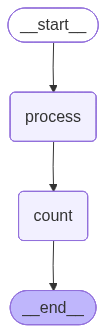

In [15]:
# 그래프 그리기
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

## Test

In [9]:
# 초기 상태 정의
initial_state = {"input_text": "hello world from langgraph"}
result = graph.invoke(initial_state)

[process_text] hello world from langgraph → HELLO WORLD FROM LANGGRAPH
[count_words] 단어 개수: 4


In [10]:
result

{'input_text': 'hello world from langgraph',
 'processed_text': 'HELLO WORLD FROM LANGGRAPH',
 'word_count': 4}